In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
file_path = r"C:\Users\Mechrevo\Desktop\Задание для кандидата Финансовые сервисы.xlsx"

movies_df = pd.read_excel(file_path, sheet_name='Movies')
marvel_dc_df = pd.read_excel(file_path, sheet_name='Marvel DC')

movies_df['Release_date'] = pd.to_datetime(movies_df['Release_date'], format='%d-%m-%Y', errors='coerce')

movies_df['Duration_min'] = movies_df['Duration'].str.extract(r'(\d+)').astype(float)

print("Данные из листа Movies:")
display(movies_df.head())
print("\nИнформация о данных Movies:")
print(movies_df.info())

Данные из листа Movies:


,ID,Title,Release_date,Overview,"Tickets_sold, mln",Vote_average,Vote_count,Director,Cast,Country,Duration,Budget,Duration_min
0,112,The Iron Giant,1999-06-08,A young boy befriends a giant robot from outer...,46.987,8.720,1948,BradBird,"EliMarienthal,HarryConnickJr.,JenniferAniston,...",United States,86 min,-,86.0
1,143,Batman Forever,1995-08-18,Batman must battle former district attorney Ha...,9.276,8.711,720,JoelSchumacher,"ValKilmer,TommyLeeJones,JimCarrey,NicoleKidman",United States,121 min,-,121.0
2,42,Schindler's List,1993-12-15,The true story of how businessman Oskar Schind...,75.014,8.573,14872,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,195 min,22000000,195.0
3,508,Avengers: Endgame,2019-03-16,After the devastating events of Avengers: Infi...,14.161,8.520,1092,"AnthonyRusso,JoeRusso","RobertDowneyJr.,ChrisEvans,MarkRuffalo,ChrisHe...",United States,181 min,-,181.0
4,687,The Dark Knight,2008-11-05,When the menace known as the Joker wreaks havo...,19.505,8.500,4905,ChristopherNolan,"ChristianBale,HeathLedger,AaronEckhart,Michael...",United States,152 min,-,152.0



Информация о данных Movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 1598 non-null   int64         
 1   Title              1598 non-null   object        
 2   Release_date       1598 non-null   datetime64[ns]
 3   Overview           1598 non-null   object        
 4   Tickets_sold, mln  1598 non-null   float64       
 5   Vote_average       1598 non-null   float64       
 6   Vote_count         1598 non-null   int64         
 7   Director           1598 non-null   object        
 8   Cast               1598 non-null   object        
 9   Country            1598 non-null   object        
 10  Duration           1598 non-null   object        
 11  Budget             1598 non-null   object        
 12  Duration_min       1598 non-null   float64       
dtypes: datetime64[ns](1), float64(3), 

**1)Какой фильм после 2005 года имеет наивысшую оценку?**

In [3]:
highest_rated_2005 = movies_df.loc[
    movies_df[movies_df['Release_date'].dt.year > 2005]['Vote_average'].idxmax()
]

print("Фильм после 2005 года с наивысшей оценкой:")
print(f"Название: {highest_rated_2005['Title']}")
print(f"Год выпуска: {highest_rated_2005['Release_date'].year}")
print(f"Оценка: {highest_rated_2005['Vote_average']}")
print(f"Количество голосов: {highest_rated_2005['Vote_count']}")

Фильм после 2005 года с наивысшей оценкой:
Название: Avengers: Endgame
Год выпуска: 2019
Оценка: 8.52
Количество голосов: 1092


**2)Сколько фильмов с бюджетом больше 80 млн. имеют оценку ниже 6.0?**


In [4]:
# Заменяем прочерки на NaN и преобразуем в числовой формат
movies_df['Budget_numeric'] = pd.to_numeric(movies_df['Budget'].replace('-', pd.NA), errors='coerce')

filtered_movies = movies_df[
    (movies_df['Budget_numeric'] > 80000000) & 
    (movies_df['Vote_average'] < 6.0)
]

count_movies = len(filtered_movies)

print(f"Количество фильмов с бюджетом больше 80 млн и оценкой ниже 6.0: {count_movies}")

Количество фильмов с бюджетом больше 80 млн и оценкой ниже 6.0: 29


**3)Найдите режиссёра, у которого средний рейтинг фильмов самый высокий (учитывая только тех, у кого 2 и более фильма в таблице).**


In [5]:
# Группируем по режиссерам и считаем средний рейтинг и количество фильмов
director_stats = movies_df.groupby('Director').agg(
    avg_rating=('Vote_average', 'mean'),
    movie_count=('ID', 'count')
).reset_index()

# Фильтруем только режиссеров с 2 и более фильмами
qualified_directors = director_stats[director_stats['movie_count'] >= 2]

# Находим режиссера с самым высоким средним рейтингом
best_director = qualified_directors.loc[qualified_directors['avg_rating'].idxmax()]

print("Режиссер с самым высоким средним рейтингом (2+ фильма):")
print(f"Режиссер: {best_director['Director']}")
print(f"Средний рейтинг: {best_director['avg_rating']:.3f}")
print(f"Количество фильмов: {best_director['movie_count']}")

Режиссер с самым высоким средним рейтингом (2+ фильма):
Режиссер: Sergio Leone
Средний рейтинг: 8.357
Количество фильмов: 2


**4)У скольких фильмов съемки проводились в нескольких странах?**

In [6]:
def count_countries(country_str):
    if pd.isna(country_str):
        return 0
    countries = [c.strip() for c in country_str.split(',') if c.strip()]
    return len(countries)

movies_df['Country_count'] = movies_df['Country'].apply(count_countries)

multi_country_films = movies_df[movies_df['Country_count'] > 1]
count_multi_country = len(multi_country_films)

print(f"Количество фильмов, снятых в нескольких странах: {count_multi_country}")

Количество фильмов, снятых в нескольких странах: 530


**6)Представим, что стоимость 1 билета равна 5$. Сколько фильмов имеют положительную прибыль? На листе для решений выведите таблицу с ТОП-10 фильмами с наибольшей прибылью и задайте соответствующее правило условного форматирования.**

In [7]:
movies_df['Revenue'] = movies_df['Tickets_sold, mln'] * 5 * 1000000  # переводим миллионы в единицы
movies_df['Profit'] = movies_df['Revenue'] - movies_df['Budget_numeric']

# Фильмы с положительной прибылью
profitable_movies = movies_df[movies_df['Profit'] > 0]

print(f"Количество фильмов с положительной прибылью: {len(profitable_movies)}")

# ТОП-10 фильмов с наибольшей прибылью
top_profit_movies = profitable_movies.nlargest(10, 'Profit')[['Title', 'Budget_numeric', 'Revenue', 'Profit']].copy()

top_profit_movies['Budget_numeric'] = top_profit_movies['Budget_numeric'].apply(lambda x: f"${x:,.0f}")
top_profit_movies['Revenue'] = top_profit_movies['Revenue'].apply(lambda x: f"${x:,.0f}")
top_profit_movies['Profit'] = top_profit_movies['Profit'].apply(lambda x: f"${x:,.0f}")

print("\nТОП-10 фильмов с наибольшей прибылью:")
display(top_profit_movies)

Количество фильмов с положительной прибылью: 632

ТОП-10 фильмов с наибольшей прибылью:


,Title,Budget_numeric,Revenue,Profit
653,How the Grinch Stole Christmas,"$123,000,000","$1,679,410,000","$1,556,410,000"
203,Willy Wonka & the Chocolate Factory,"$3,000,000","$914,485,000","$911,485,000"
471,Charlie and the Chocolate Factory,"$150,000,000","$1,021,210,000","$871,210,000"
15,Inception,"$160,000,000","$660,250,000","$500,250,000"
5,Pulp Fiction,"$8,000,000","$495,815,000","$487,815,000"
83,Coraline,"$60,000,000","$530,980,000","$470,980,000"
1010,Twilight,"$37,000,000","$495,525,000","$458,525,000"
6,The Lord of the Rings: The Return of the King,"$94,000,000","$550,740,000","$456,740,000"
1483,Jupiter Ascending,"$176,000,003","$625,985,000","$449,984,997"
676,The Polar Express,"$165,000,000","$611,735,000","$446,735,000"


**7)Сгруппируйте фильмы в разрезе десятилетий по среднему рейтингу и постройте диаграмму на листе для решений. Запишите в ответ средний рейтинг для 2010-2019 годов.**

Средний рейтинг для 2010-2019 годов: 6.471


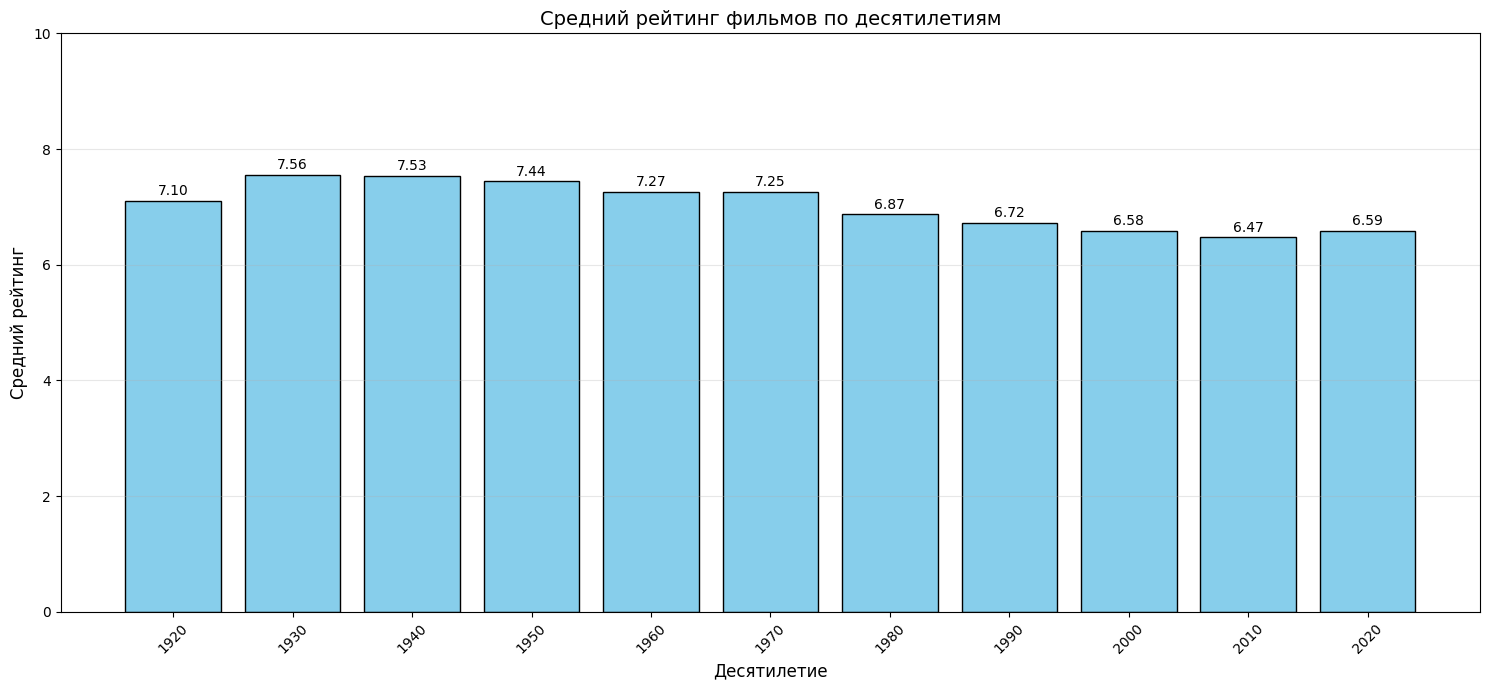


Средние рейтинги по десятилетиям:


,Decade,Vote_average
0,1920,7.104000
1,1930,7.558000
2,1940,7.533333
3,1950,7.439800
4,1960,7.265333
5,1970,7.254810
6,1980,6.868673
7,1990,6.719709
8,2000,6.581327
9,2010,6.471329


In [8]:
# Создаем столбец с десятилетием
movies_df['Decade'] = (movies_df['Release_date'].dt.year // 10) * 10

# Группируем по десятилетиям и считаем средний рейтинг
decade_ratings = movies_df.groupby('Decade')['Vote_average'].mean().reset_index()

# Находим средний рейтинг для 2010-2019 годов
rating_2010s = decade_ratings[decade_ratings['Decade'] == 2010]['Vote_average'].values[0]

print(f"Средний рейтинг для 2010-2019 годов: {rating_2010s:.3f}")

plt.figure(figsize=(15, 7))
bars = plt.bar(decade_ratings['Decade'].astype(str), decade_ratings['Vote_average'], 
               color='skyblue', edgecolor='black')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.2f}', ha='center', va='bottom')

plt.title('Средний рейтинг фильмов по десятилетиям', fontsize=14)
plt.xlabel('Десятилетие', fontsize=12)
plt.ylabel('Средний рейтинг', fontsize=12)
plt.ylim(0, 10)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nСредние рейтинги по десятилетиям:")
display(decade_ratings)

**8)Определите для каждого фильма тип бюджета: "низкобюджетные" (<10 млн), "среднебюджетные" (10-50 млн), "высокобюджетные" (50-100 млн), "блокбастеры" (>100 млн). Визуализируйте распределение количества фильмов по каждой категории на листе для решений с помощью диаграммы. Сколько фильмов попадает в категорию "среднебюджетные"?**

Количество фильмов в категории 'среднебюджетные': 314


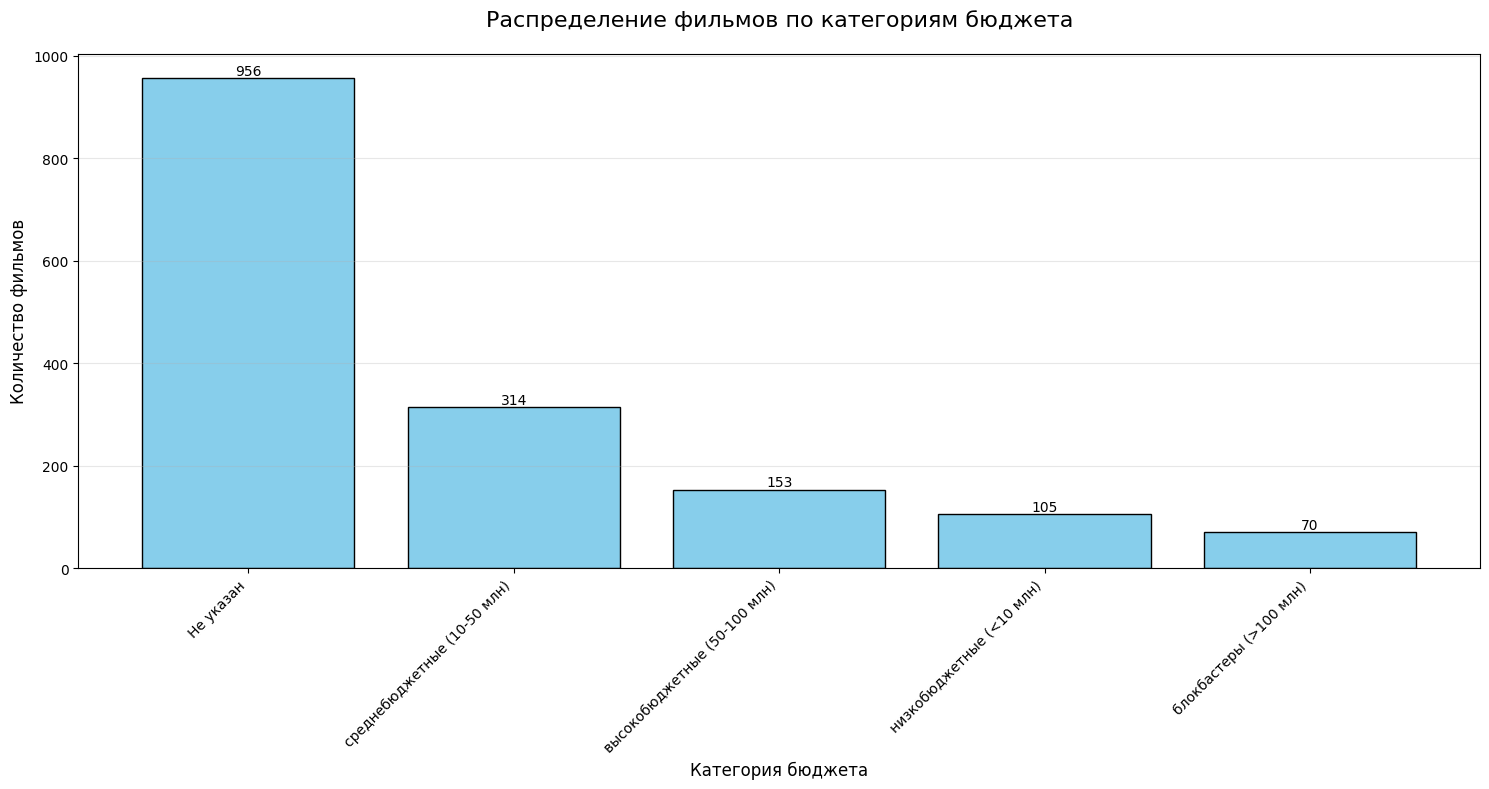


Распределение фильмов по категориям бюджета:


,Budget_Category,Count
0,Не указан,956
1,среднебюджетные (10-50 млн),314
2,высокобюджетные (50-100 млн),153
3,низкобюджетные (<10 млн),105
4,блокбастеры (>100 млн),70


In [9]:
# Определяем категории бюджета
def budget_category(budget):
    if pd.isna(budget):
        return 'Не указан'
    elif budget < 10000000:
        return 'низкобюджетные (<10 млн)'
    elif 10000000 <= budget <= 50000000:
        return 'среднебюджетные (10-50 млн)'
    elif 50000000 < budget <= 100000000:
        return 'высокобюджетные (50-100 млн)'
    else:
        return 'блокбастеры (>100 млн)'

movies_df['Budget_Category'] = movies_df['Budget_numeric'].apply(budget_category)
budget_counts = movies_df['Budget_Category'].value_counts().reset_index()
budget_counts.columns = ['Budget_Category', 'Count']

# Находим количество среднебюджетных фильмов
medium_budget_count = budget_counts[budget_counts['Budget_Category'] == 'среднебюджетные (10-50 млн)']['Count'].values[0]

print(f"Количество фильмов в категории 'среднебюджетные': {medium_budget_count}")

# Визуализация
plt.figure(figsize=(15, 8))
bars = plt.bar(budget_counts['Budget_Category'], budget_counts['Count'], color='skyblue', edgecolor='black')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom')

plt.title('Распределение фильмов по категориям бюджета', fontsize=16, pad=20)
plt.xlabel('Категория бюджета', fontsize=12)
plt.ylabel('Количество фильмов', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Выводим таблицу с распределением
print("\nРаспределение фильмов по категориям бюджета:")
display(budget_counts)

**9)Сопоставьте результаты оценки фильмов из текущего файла с листа "Movies" с результатами по версии IMDB. Определите средний размер разницы оценок из двух источников (там, где это возможно).**


**xlsm Файл был заранее обработан и корректно отформатирован с сохранением исходных данных**

In [10]:
# Загрузка данных из CSV файла IMDB
imdb_df = pd.read_excel(r"Лист в Задание для кандидата Финансовые сервисы.xlsm")
imdb_df['Premiere'] = pd.to_datetime(imdb_df['Premiere'], errors='coerce')

# Просмотр структуры данных IMDB
print("Данные IMDB:")
display(imdb_df.head())
print("\nИнформация о данных IMDB:")
print(imdb_df.info())

Данные IMDB:


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi



Информация о данных IMDB:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    579 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.5+ KB
None


In [11]:
# Приводим названия фильмов к одинаковому формату для сопоставления
movies_df['Title_clean'] = movies_df['Title'].str.lower().str.strip()
imdb_df['Title_clean'] = imdb_df['Title'].str.lower().str.strip()

# Объединяем данные по названиям фильмов
merged_df = pd.merge(movies_df, imdb_df, on='Title_clean', how='inner', suffixes=('_our', '_imdb'))

print(f"Найдено совпадений: {len(merged_df)}")
print(f"Всего фильмов в нашей базе: {len(movies_df)}")
print(f"Всего фильмов в IMDB базе: {len(imdb_df)}")

# Вычисляем абсолютную разницу оценок
merged_df['Rating_Difference'] = abs(merged_df['Vote_average'] - merged_df['IMDB Score'])

# Средняя разница оценок
avg_difference = merged_df['Rating_Difference'].mean()

print(f"\nСредняя абсолютная разница оценок между нашими данными и IMDB: {avg_difference:.3f}")

# ТОП-10 фильмов с наибольшими различиями
print("\nТОП-10 фильмов с наибольшими различиями оценок:")
top_differences = merged_df.nlargest(10, 'Rating_Difference')[['Title_our', 'Vote_average', 'IMDB Score', 'Rating_Difference']]
display(top_differences)

# ТОП-10 фильмов с наименьшими различиями
print("\nТОП-10 фильмов с наименьшими различиями оценок:")
top_similar = merged_df.nsmallest(10, 'Rating_Difference')[['Title_our', 'Vote_average', 'IMDB Score', 'Rating_Difference']]
display(top_similar)

Найдено совпадений: 236
Всего фильмов в нашей базе: 1598
Всего фильмов в IMDB базе: 584

Средняя абсолютная разница оценок между нашими данными и IMDB: 0.570

ТОП-10 фильмов с наибольшими различиями оценок:


,Title_our,Vote_average,IMDB Score,Rating_Difference
18,Drive,7.576,3.5,4.076
19,The Call,7.546,4.1,3.446
97,The Last Days of American Crime,6.588,3.7,2.888
74,The Call,6.796,4.1,2.696
21,Fearless,7.493,4.9,2.593
57,Death Note,6.951,4.4,2.551
113,Ghost Stories,6.463,4.3,2.163
232,Extraction,4.554,6.7,2.146
120,The Girl on the Train,6.434,4.4,2.034
8,Rich in Love,7.745,5.8,1.945



ТОП-10 фильмов с наименьшими различиями оценок:


,Title_our,Vote_average,IMDB Score,Rating_Difference
30,The Fundamentals of Caring,7.300,7.3,0.000
80,Tallulah,6.700,6.7,0.000
179,iBoy,6.000,6.0,0.000
202,The Do-Over,5.700,5.7,0.000
145,The Discovery,6.296,6.3,0.004
170,Lost Girls,6.096,6.1,0.004
71,The Boys in the Band,6.806,6.8,0.006
108,Mowgli: Legend of the Jungle,6.491,6.5,0.009
96,I'm Thinking of Ending Things,6.590,6.6,0.010
215,Wine Country,5.488,5.5,0.012


**10)На листе "Marvel DC" список фильмов про супергероев. Сопоставьте его с фильмами с листа "Movies" и определите, какая из двух компаний круче, приведите аргументы на листе для решений.**

Из данных, достпупных нам, можем сделать вывод успешности, основываясь на: средней продаже билетов на фильм, средней оценке за фильмы, а также окупаемости за фильм

In [12]:
# Анализируем фильмы Marvel и DC
print("Данные с листа Marvel DC:")
print(marvel_dc_df['Company'].value_counts())

Данные с листа Marvel DC:
Company
DC        1301
Marvel     389
Name: count, dtype: int64


Как видим, фильмов у DC больше почти в 4 раза, будем иметь это в виду при анализе

In [13]:
# Учитываем разницу в количестве фильмов при анализе
company_counts = marvel_dc_df['Company'].value_counts()

print(f"\nСоотношение: DC : Marvel = {company_counts['DC']/company_counts['Marvel']:.1f}:1")


Соотношение: DC : Marvel = 3.3:1


In [14]:
# Сопоставляем фильмы Marvel и DC с основными данными
movies_df['Title_clean'] = movies_df['Title'].str.lower().str.strip()
marvel_dc_df['Title_clean'] = marvel_dc_df['Movie'].str.lower().str.strip()

# Объединяем данные
superhero_movies = pd.merge(movies_df, marvel_dc_df, on='Title_clean', how='inner')

print(f"\nНайдено совпадений супергеройских фильмов: {len(superhero_movies)}")


Найдено совпадений супергеройских фильмов: 179


Несмотря на перевес в сторону DC, всего супергеройских фильмов у нас набежало 179 штук

In [15]:
# Анализ по компаниям
company_analysis = superhero_movies.groupby('Company').agg({
    'Tickets_sold, mln': ['mean', 'sum', 'count'],
    'Vote_average': 'mean',
    'Revenue': 'mean',
    'Profit': ['mean', 'sum']
}).round(2)

# Переименовываем колонки для удобства
company_analysis.columns = [
    'Средние_продажи_билетов_млн', 'Общие_продажи_млн', 'Кол-во_фильмов_продажи',
    'Средняя_оценка', 'Средний_доход', 'Средняя_прибыль', 'Общая_прибыль'
]

# Выделяем метрики для каждой компании
marvel_metrics = company_analysis.loc['Marvel']
dc_metrics = company_analysis.loc['DC']

In [16]:
# Сравниваем ключевые метрики
comparison_results = []

metrics_to_compare = ['Средние_продажи_билетов_млн', 'Средняя_оценка', 'Средняя_прибыль']
for metric in metrics_to_compare:
    marvel_value = marvel_metrics[metric]
    dc_value = dc_metrics[metric]
    
    if marvel_value > dc_value:
        winner = 'Marvel'
        advantage = f"+{(marvel_value/dc_value - 1)*100:.1f}%"
    else:
        winner = 'DC'
        advantage = f"+{(dc_value/marvel_value - 1)*100:.1f}%"
    
    comparison_results.append({
        'Метрика': metric,
        'Marvel': marvel_value,
        'DC': dc_value,
        'Победитель': winner,
        'Преимущество': advantage
    })

In [17]:
# Создаем DataFrame для сравнения
comparison_df = pd.DataFrame(comparison_results)

# Форматируем денежные показатели для лучшей читаемости
company_analysis_formatted = company_analysis.copy()

# Форматируем денежные колонки
money_columns = ['Средняя_прибыль', 'Общая_прибыль']
for col in money_columns:
    company_analysis_formatted[col] = company_analysis_formatted[col].apply(lambda x: f"${x:,.0f}")

# Форматируем продажи билетов
ticket_columns = ['Средние_продажи_билетов_млн', 'Общие_продажи_млн']
for col in ticket_columns:
    company_analysis_formatted[col] = company_analysis_formatted[col].apply(lambda x: f"{x:,.1f}M")

# Форматируем оценки
company_analysis_formatted['Средняя_оценка'] = company_analysis_formatted['Средняя_оценка'].apply(lambda x: f"{x:.2f}")

print("\nДетальный анализ компаний (с учетом количества фильмов):")
display(company_analysis_formatted)


Детальный анализ компаний (с учетом количества фильмов):


,Средние_продажи_билетов_млн,Общие_продажи_млн,Кол-во_фильмов_продажи,Средняя_оценка,Средний_доход,Средняя_прибыль,Общая_прибыль
Company,,,,,,,
DC,19.4M,"2,853.4M",147,6.69,9.705541e+07,"$98,201,923","$1,276,625,000"
Marvel,36.2M,"1,157.5M",32,7.10,1.808655e+08,"$44,551,357","$311,859,500"


In [18]:
# Форматируем таблицу сравнения метрик
metrics_comparison_formatted = comparison_df.copy()
metrics_comparison_formatted['Marvel'] = metrics_comparison_formatted['Marvel'].apply(lambda x: f"{x:.2f}")
metrics_comparison_formatted['DC'] = metrics_comparison_formatted['DC'].apply(lambda x: f"{x:.2f}")

print(f"\nСравнение ключевых метрик:")
display(metrics_comparison_formatted)


Сравнение ключевых метрик:


,Метрика,Marvel,DC,Победитель,Преимущество
0,Средние_продажи_билетов_млн,36.17,19.41,Marvel,+86.3%
1,Средняя_оценка,7.10,6.69,Marvel,+6.1%
2,Средняя_прибыль,44551357.14,98201923.08,DC,+120.4%


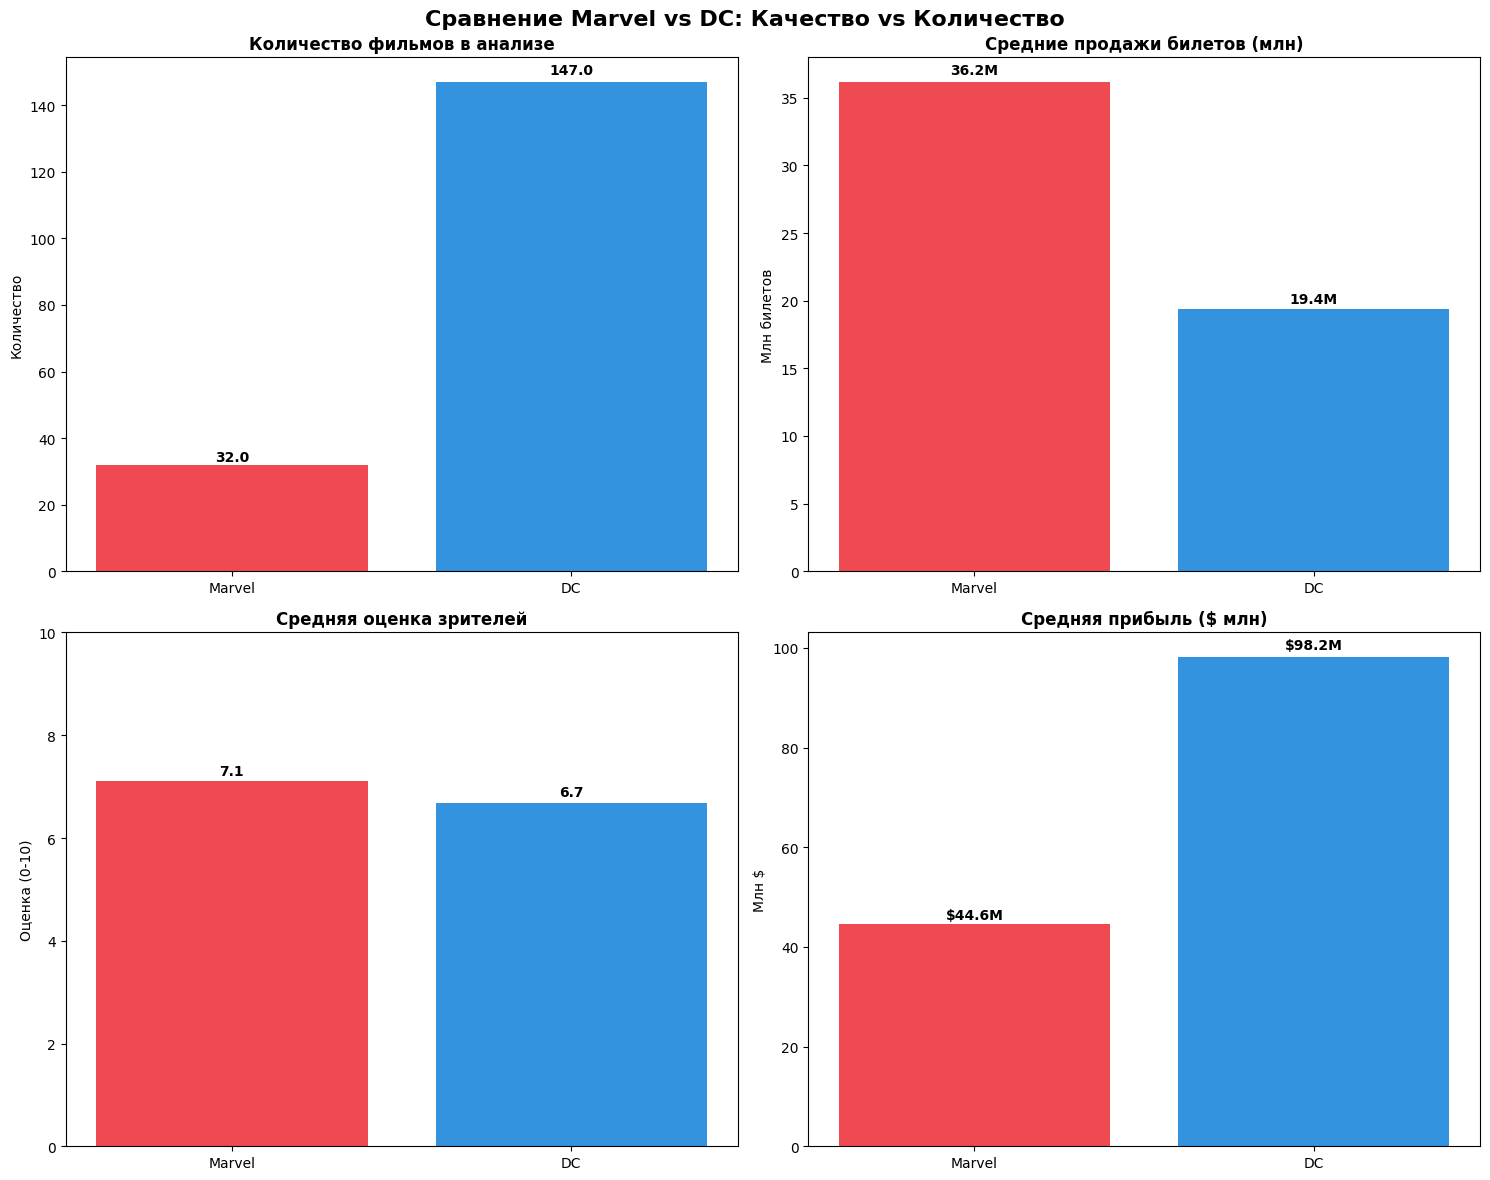

In [19]:
# Визуализация с акцентом на качестве vs количестве
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Сравнение Marvel vs DC: Качество vs Количество', fontsize=16, fontweight='bold')

# 1. Количество фильмов
axes[0,0].bar(['Marvel', 'DC'], 
             [marvel_metrics['Кол-во_фильмов_продажи'], dc_metrics['Кол-во_фильмов_продажи']],
             color=['#EC1D25', '#0078D7'], alpha=0.8)
axes[0,0].set_title('Количество фильмов в анализе', fontweight='bold')
axes[0,0].set_ylabel('Количество')

# 2. Средние продажи билетов
axes[0,1].bar(['Marvel', 'DC'], 
             [marvel_metrics['Средние_продажи_билетов_млн'], dc_metrics['Средние_продажи_билетов_млн']],
             color=['#EC1D25', '#0078D7'], alpha=0.8)
axes[0,1].set_title('Средние продажи билетов (млн)', fontweight='bold')
axes[0,1].set_ylabel('Млн билетов')

# 3. Средняя оценка
axes[1,0].bar(['Marvel', 'DC'], 
             [marvel_metrics['Средняя_оценка'], dc_metrics['Средняя_оценка']],
             color=['#EC1D25', '#0078D7'], alpha=0.8)
axes[1,0].set_title('Средняя оценка зрителей', fontweight='bold')
axes[1,0].set_ylabel('Оценка (0-10)')
axes[1,0].set_ylim(0, 10)

# 4. Средняя прибыль
axes[1,1].bar(['Marvel', 'DC'], 
             [marvel_metrics['Средняя_прибыль']/1000000, dc_metrics['Средняя_прибыль']/1000000],
             color=['#EC1D25', '#0078D7'], alpha=0.8)
axes[1,1].set_title('Средняя прибыль ($ млн)', fontweight='bold')
axes[1,1].set_ylabel('Млн $')

# Добавляем значения на графики
for ax in axes.flat:
    for bar in ax.containers[0]:
        height = bar.get_height()
        if ax == axes[1,1]:  # Для прибыли в миллионах
            text = f'${height:.1f}M'
        elif ax == axes[0,1]:  # Для продаж билетов
            text = f'{height:.1f}M'
        else:
            text = f'{height:.1f}'
        
        ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
               text, ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [22]:
print(f"\n" + "-"*80)
print("СРАВНЕНИЕ ПО КАЖДОЙ МЕТРИКЕ:".center(80))
print("-"*80)
for result in comparison_results:
    metric_name = ""
    if result['Метрика'] == 'Средние_продажи_билетов_млн':
        metric_name = "ПРОДАЖИ БИЛЕТОВ"
        unit = "млн билетов"
    elif result['Метрика'] == 'Средняя_оценка':
        metric_name = "ЗРИТЕЛЬСКИЕ ОЦЕНКИ" 
        unit = "баллов из 10"
    elif result['Метрика'] == 'Средняя_прибыль':
        metric_name = "ОКУПАЕМОСТЬ И ПРИБЫЛЬ"
        unit = "$"
    
    print(f"\n  {metric_name}:")
    print(f"    Marvel: {result['Marvel']:.2f} {unit}")
    print(f"    DC: {result['DC']:.2f} {unit}")
    print(f"    {result['Преимущество']} в пользу {result['Победитель']}!")


--------------------------------------------------------------------------------
                          СРАВНЕНИЕ ПО КАЖДОЙ МЕТРИКЕ:                          
--------------------------------------------------------------------------------

  ПРОДАЖИ БИЛЕТОВ:
    Marvel: 36.17 млн билетов
    DC: 19.41 млн билетов
    +86.3% в пользу Marvel!

  ЗРИТЕЛЬСКИЕ ОЦЕНКИ:
    Marvel: 7.10 баллов из 10
    DC: 6.69 баллов из 10
    +6.1% в пользу Marvel!

  ОКУПАЕМОСТЬ И ПРИБЫЛЬ:
    Marvel: 44551357.14 $
    DC: 98201923.08 $
    +120.4% в пользу DC!


MARVEL ЛУЧШЕ В:
- Коммерческий успех (продажи билетов)
- Зрительские симпатии (оценки)

DC ЛУЧШЕ В:
- Экономическая эффективность (прибыль)

Добавим анализ взвешенного среднего, так как у DC в 4 раза больше фильмов

**Доля фильмов в анализе:**
- Marvel: 17.9% (32 фильмов)
- DC: 82.1% (147 фильмов)

**ДОХОД И ПРОДАЖИ: ВКЛАД vs ДОЛЯ ФИЛЬМОВ**
- Marvel: 19.6% от общей прибыли | 28.9% от всех проданных билетов
- DC: 80.4% от общей прибыли | 71.1% от всех проданных билетов

**АНАЛИЗ ЭФФЕКТИВНОСТИ**
- Если бы студии были одинаково эффективны, их вклад в прибыль совпадал бы с долей фильмов.

**Отклонение эффективности (Вклад в прибыль - Доля фильмов):**
- Marvel: +1.8%
- DC: -1.8%

**ВЫВОД: Фильмы Marvel в среднем БОЛЕЕ прибыльны и эффективны, так как их вклад в общую прибыль превышает их долю в количестве фильмов.**

**11)"Проведите дополнительный анализ таблицы. Сделайте один или несколько слайдов в формате PowerPoint, где отразите подход и основные выводы анализа. Можете проаргументировать выводы с помощью таблиц, графиков или других элементов визуализации. 
Презентацию необходимо сохранить под названием ""Ваше Имя_Ваша Фамилия"".pptx и направьте письмом вместе с данным файлом."**

In [25]:
# Анализ режиссеров
print("ТОП-10 режиссеров по среднему рейтингу (минимум 3 фильма):")
director_stats_3plus = director_stats[director_stats['movie_count'] >= 3]
top_directors = director_stats_3plus.nlargest(10, 'avg_rating')
display(top_directors)

ТОП-10 режиссеров по среднему рейтингу (минимум 3 фильма):


,Director,avg_rating,movie_count
827,Peter Jackson,7.980000,3
847,Quentin Tarantino,7.976000,7
77,"AnthonyRusso,JoeRusso",7.813333,3
689,Martin Scorsese,7.671875,8
810,Paul Thomas Anderson,7.574600,5
981,Stanley Kubrick,7.570667,3
1055,Tom Hooper,7.489200,5
1065,Toshiyuki Kubooka,7.406333,3
1094,Wilson Yip,7.380500,4
203,Clint Eastwood,7.365143,7


В целом результаты ожидаемы, все указанные режиссеры обладают своими хитами и большой фан базой

In [27]:
# Функция для извлечения актеров
def extract_actors(cast_str):
    if pd.isna(cast_str):
        return []
    # Убираем квадратные скобки и кавычки, разделяем по запятым
    actors = [actor.strip().replace("'", "").replace('"', '') 
              for actor in cast_str.strip('[]').split(',')]
    return [actor for actor in actors if actor]  # Убираем пустые строки

# Создаем список всех актеров
all_actors = []
for cast in movies_df['Cast']:
    all_actors.extend(extract_actors(cast))

# Считаем частоту появлений
actor_counts = Counter(all_actors)
print(f"\nВсего уникальных актеров: {len(actor_counts)}")

# ТОП-20 самых снимающихся актеров
print("\nТОП-20 самых снимающихся актеров:")
top_20_actors = pd.DataFrame(actor_counts.most_common(20), columns=['Actor', 'Movie_Count'])
display(top_20_actors)


Всего уникальных актеров: 8978

ТОП-20 самых снимающихся актеров:


,Actor,Movie_Count
0,Adam Sandler,19
1,Samuel L. Jackson,18
2,Nicolas Cage,18
3,Bruce Willis,16
4,Michael Peña,15
5,John Travolta,14
6,Anthony Mackie,14
7,Morgan Freeman,14
8,Willem Dafoe,14
9,Johnny Depp,14


В топе по съемкам у нас актеры, которые чаще всего снимаются в комедиях, боевиках и драмах (самые популярные жанры)

In [35]:
# Анализ актеров по среднему рейтингу фильмов
actor_movies = {}
for idx, row in movies_df.iterrows():
    actors = extract_actors(row['Cast'])
    for actor in actors:
        if actor not in actor_movies:
            actor_movies[actor] = {'ratings': [], 'tickets': [], 'count': 0}
        actor_movies[actor]['ratings'].append(row['Vote_average'])
        actor_movies[actor]['tickets'].append(row['Tickets_sold, mln'])
        actor_movies[actor]['count'] += 1

# Создаем датафрейм для анализа актеров
actor_stats = []
for actor, data in actor_movies.items():
    if data['count'] >= 5:  # только актеры с минимум 5 фильмами
        actor_stats.append({
            'Actor': actor,
            'Movie_Count': data['count'],
            'Avg_Rating': sum(data['ratings']) / len(data['ratings']),
            'Avg_Tickets': sum(data['tickets']) / len(data['tickets'])
        })

actor_df = pd.DataFrame(actor_stats)

In [36]:
print("\nТОП-10 актеров по среднему рейтингу (минимум 5 фильмов):")
top_actors_rating = actor_df.nlargest(10, 'Avg_Rating')
display(top_actors_rating[['Actor', 'Movie_Count', 'Avg_Rating']])


ТОП-10 актеров по среднему рейтингу (минимум 5 фильмов):


,Actor,Movie_Count,Avg_Rating
25,Leonardo DiCaprio,8,7.854750
69,Minako Kotobuki,5,7.664000
4,RobertDowneyJr.,8,7.490500
10,Maria de Medeiros,5,7.445600
29,Edward Norton,6,7.434667
17,Hugo Weaving,7,7.431429
32,Mark Ruffalo,6,7.415333
92,John Mahoney,5,7.373600
91,Clint Eastwood,5,7.357800
18,Robert De Niro,10,7.349100


In [37]:
print("\nТОП-10 актеров по средним продажам билетов (минимум 5 фильмов):")
top_actors_tickets = actor_df.nlargest(10, 'Avg_Tickets')
display(top_actors_tickets[['Actor', 'Movie_Count', 'Avg_Tickets']])


ТОП-10 актеров по средним продажам билетов (минимум 5 фильмов):


,Actor,Movie_Count,Avg_Tickets
465,Mindy Sterling,5,92.480200
34,Benedict Cumberbatch,5,85.168000
415,Jeffrey Tambor,6,84.458333
32,Mark Ruffalo,6,81.689167
10,Maria de Medeiros,5,75.785200
33,Chris Evans,8,74.795500
305,Gina Gershon,5,74.023200
304,William Moseley,5,72.982200
219,Anthony Hopkins,10,71.750300
109,Missi Pyle,5,69.697800


In [42]:
def extract_countries(country_str):
    if pd.isna(country_str):
        return []
    countries = [country.strip() for country in country_str.split(',')]
    return [country for country in countries if country]

all_countries = []
for countries in movies_df['Country']:
    all_countries.extend(extract_countries(countries))

country_counts = Counter(all_countries)

print("ТОП-15 стран по количеству фильмов:")
top_countries = pd.DataFrame(country_counts.most_common(15), columns=['Country', 'Movie_Count'])
display(top_countries)

ТОП-15 стран по количеству фильмов:


,Country,Movie_Count
0,United States,1267
1,United Kingdom,260
2,France,136
3,Canada,133
4,Germany,92
5,Spain,51
6,India,47
7,China,40
8,Australia,40
9,Japan,34


In [43]:
country_stats = {}
for idx, row in movies_df.iterrows():
    countries = extract_countries(row['Country'])
    for country in countries:
        if country not in country_stats:
            country_stats[country] = {'ratings': [], 'tickets': [], 'profit': [], 'count': 0}
        country_stats[country]['ratings'].append(row['Vote_average'])
        country_stats[country]['tickets'].append(row['Tickets_sold, mln'])
        country_stats[country]['profit'].append(row['Profit'] if not pd.isna(row['Profit']) else 0)
        country_stats[country]['count'] += 1

country_analysis = []
for country, data in country_stats.items():
    if data['count'] >= 10:  # только страны с минимум 10 фильмами
        country_analysis.append({
            'Country': country,
            'Movie_Count': data['count'],
            'Avg_Rating': sum(data['ratings']) / len(data['ratings']),
            'Avg_Tickets': sum(data['tickets']) / len(data['tickets']),
            'Avg_Profit': sum(data['profit']) / len(data['profit'])
        })

country_df = pd.DataFrame(country_analysis)

In [44]:
print("\nТОП-10 стран по среднему рейтингу (минимум 10 фильмов):")
top_countries_rating = country_df.nlargest(10, 'Avg_Rating')
display(top_countries_rating[['Country', 'Movie_Count', 'Avg_Rating']])


ТОП-10 стран по среднему рейтингу (минимум 10 фильмов):


,Country,Movie_Count,Avg_Rating
1,New Zealand,12,7.209917
14,South Korea,13,7.112846
9,Japan,34,7.107176
3,Brazil,13,7.081077
2,India,47,6.982596
15,Mexico,19,6.940000
10,Hong Kong,23,6.925783
12,Ireland,18,6.857944
6,Italy,32,6.774156
11,China,40,6.710975


In [45]:
print("\nТОП-10 стран по средним продажам билетов (минимум 10 фильмов):")
top_countries_tickets = country_df.nlargest(10, 'Avg_Tickets')
display(top_countries_tickets[['Country', 'Movie_Count', 'Avg_Tickets']])


ТОП-10 стран по средним продажам билетов (минимум 10 фильмов):


,Country,Movie_Count,Avg_Tickets
1,New Zealand,12,41.361333
3,Brazil,13,35.798308
18,Czech Republic,11,34.268182
9,Japan,34,34.075235
14,South Korea,13,32.113846
16,Australia,40,32.017025
15,Mexico,19,31.976000
0,United States,1267,31.919876
11,China,40,31.677200
10,Hong Kong,23,31.296565


In [46]:
print("\nТОП-10 стран по средней прибыли (минимум 10 фильмов):")
top_countries_profit = country_df.nlargest(10, 'Avg_Profit')
display(top_countries_profit[['Country', 'Movie_Count', 'Avg_Profit']])


ТОП-10 стран по средней прибыли (минимум 10 фильмов):


,Country,Movie_Count,Avg_Profit
1,New Zealand,12,1.288025e+08
16,Australia,40,7.530950e+07
0,United States,1267,6.425791e+07
5,Germany,92,6.217435e+07
14,South Korea,13,5.771923e+07
7,United Kingdom,260,5.385026e+07
18,Czech Republic,11,5.372727e+07
10,Hong Kong,23,4.996174e+07
15,Mexico,19,4.848658e+07
13,Canada,133,4.379056e+07


США: 1267 фильмов - абсолютный лидер по количеству. Это голливудская киноиндустрия с самым большим бюджетом, глобальным распределением и звездами мирового уровня.

Новая Зеландия: 1-е место по рейтингу, продажам и прибыли - этот феномен почти полностью объясняется одним именем: Питер Джексон и его работами: Властелин колец и Хоббит (трилогии)

Успех Южной Кореи и Японии
Высокие позиции в рейтингах объясняются качественным авторским кино и оригинальным подходом, раскрытию человеческих пороков